In [2]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [3]:
os.getcwd()

'C:\\Users\\sherw\\AAA_Term3_CV_HWs\\HW1'

In [4]:
os.chdir(r'C:\Users\sherw\OneDrive\Desktop\HW1_Vision\New folder')

In [5]:
img = cv2.imread('Edge.png',0)

In [6]:
plt.rcParams['figure.figsize'] = (6,6)

In [6]:
# plt.style.use(['dark_background'])

## Sobel:

In [184]:
sx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize = 3)
sy = cv2.Sobel(img,cv2.CV_64F,0,1,ksize = 3)

In [185]:
s = np.abs(sx)+np.abs(sy)

In [186]:
s = (s*255/s.max()).astype(np.int)

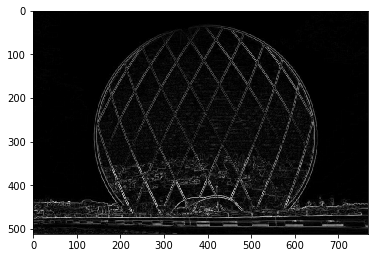

In [187]:
plt.imshow(s,'gray')
plt.show()

In [188]:
sobel_edge = s.astype(np.int)
sobel_edge[sobel_edge<=30] = 0
sobel_edge[sobel_edge>30] = 1

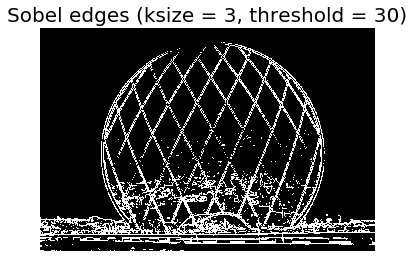

True

In [189]:
plt.imshow(sobel_edge,'gray')
plt.axis('off')
plt.title('Sobel edges (ksize = 3, threshold = 30)',size = 20)
plt.show()
cv2.imwrite('sobel_edge.jpg',sobel_edge*255)

### kernel size evaluation:

In [412]:
plt.rcParams['figure.figsize'] = (9,9)

In [413]:
s_ksizes = [3,9,15,21]

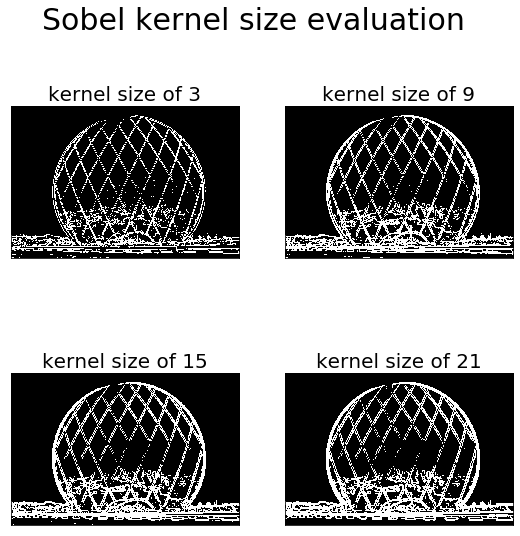

In [414]:
for i in range(len(s_ksizes)):
    plt.subplot(2,2,i+1)
    sx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize = s_ksizes[i])
    sy = cv2.Sobel(img,cv2.CV_64F,0,1,ksize = s_ksizes[i])
    s = np.abs(sx)+np.abs(sy)
    s = (s*255/s.max()).astype(np.int)
    
    sobel_edge = s
    sobel_edge[sobel_edge<=30] = 0
    sobel_edge[sobel_edge>30] = 1
    
    plt.imshow(sobel_edge,'gray')
    plt.title('kernel size of {}'.format(s_ksizes[i]),size = 20)
    plt.xticks([])
    plt.yticks([])
plt.suptitle('Sobel kernel size evaluation',size=30)
plt.savefig('sobel_ksize_eval.png')
plt.show()

## LoG:

In [50]:
def Zero_crossing(image):
    z_c_image = np.zeros(image.shape)

    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            negative_count = 0
            positive_count = 0
            neighbour = [image[i+1, j-1],image[i+1, j],image[i+1, j+1],image[i, j-1],image[i, j+1],image[i-1, j-1],image[i-1, j],image[i-1, j+1]]
            d = max(neighbour)
            e = min(neighbour)
            for h in neighbour:
                if h>0:
                    positive_count += 1
                elif h<0:
                    negative_count += 1

            z_c = ((negative_count > 0) and (positive_count > 0))

            if z_c:
                if image[i,j]>0:
                    z_c_image[i, j] = image[i,j] + np.abs(e)
                elif image[i,j]<0:
                    z_c_image[i, j] = np.abs(image[i,j]) + d
                
    z_c_norm = z_c_image/z_c_image.max()*255
    z_c_image = np.uint8(z_c_norm)
 
    return z_c_image

In [63]:
img_rgb = cv2.imread('Edge.png')
blurred = cv2.GaussianBlur(img_rgb,(5,5),0)
blurred = cv2.cvtColor(blurred,cv2.COLOR_BGR2GRAY)
laplacian = cv2.Laplacian(blurred,cv2.CV_64F,ksize = 5)
log_edge = Zero_crossing(laplacian)

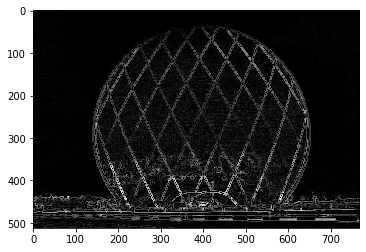

In [64]:
plt.imshow(log_edge,'gray')

In [65]:
temp = log_edge.copy()
thr = 40
temp[temp>=thr] = 255
temp[temp<thr] = 0

cv2.imwrite('LOG_edge.jpg',temp)

True

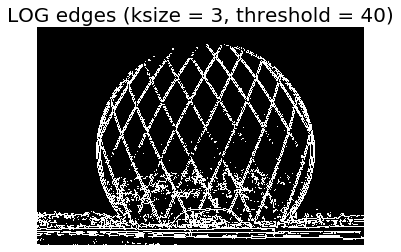

In [66]:
plt.imshow(temp,'gray')
plt.title('LOG edges (ksize = 3, threshold = 40)',size = 20)
plt.axis('off')
plt.show()

### kernel size evaluation:

In [60]:
log_ksizes = [3,9,15,21]
log_thr = [40,35,35,30]

In [61]:
img_rgb = cv2.imread('Edge.png')
blurred = cv2.GaussianBlur(img_rgb,(5,5),0)
blurred = cv2.cvtColor(blurred,cv2.COLOR_BGR2GRAY)

log_results = []
for i in range(len(log_ksizes)):
    
#     plt.subplot(2,2,i+1)
    img_rgb = cv2.imread('Edge.png')
    blurred = cv2.GaussianBlur(img_rgb,(5,5),0)
    blurred = cv2.cvtColor(blurred,cv2.COLOR_BGR2GRAY)
    laplacian = cv2.Laplacian(blurred,cv2.CV_64F,ksize = log_ksizes[i])
    log_edge = Zero_crossing(laplacian)
    
    temp = log_edge.copy()
    thr = log_thr[i]
    temp[temp>=thr] = 255
    temp[temp<thr] = 0
    
    log_results.append(temp)
    
#     plt.imshow(temp,'gray')
#     plt.title('kernel size of {}'.format(log_ksizes[i]),size = 20)
#     plt.xticks([])
#     plt.yticks([])
# plt.suptitle('LoG kernel size evaluation',size=30)
# plt.show()

In [410]:
plt.rcParams['figure.figsize'] = (9,9)

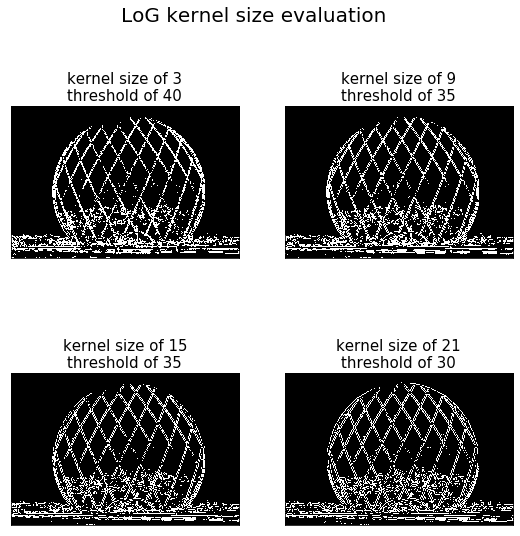

In [411]:
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(log_results[i],'gray')
    plt.title('kernel size of {}\nthreshold of {}'.format(log_ksizes[i],log_thr[i]),size = 15)
    plt.xticks([])
    plt.yticks([])
plt.suptitle('LoG kernel size evaluation',size=20)
plt.savefig('log_ksize_eval.png')
plt.show()

## Canny:

In [400]:
blurred = cv2.GaussianBlur(img,(5,5),0)

In [401]:
# plt.imshow(blurred,'gray')

In [402]:
canny_edges = cv2.Canny(blurred,30,150)

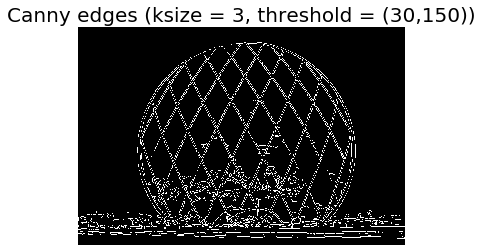

In [404]:
plt.imshow(canny_edges,'gray')
cv2.imwrite('canny_edge.jpg',canny_edges)
plt.title('Canny edges (ksize = 3, threshold = (30,150))',size = 20)
plt.axis('off')
plt.show()

### kernel size evaluation:

In [407]:
plt.rcParams['figure.figsize'] = (9,9)

In [408]:
can_ksizes = [3,5,7]
gauss_size = [(5,5),(15,15),(27,27)]
thresh = [(30,150),(210,240),(200,230)]

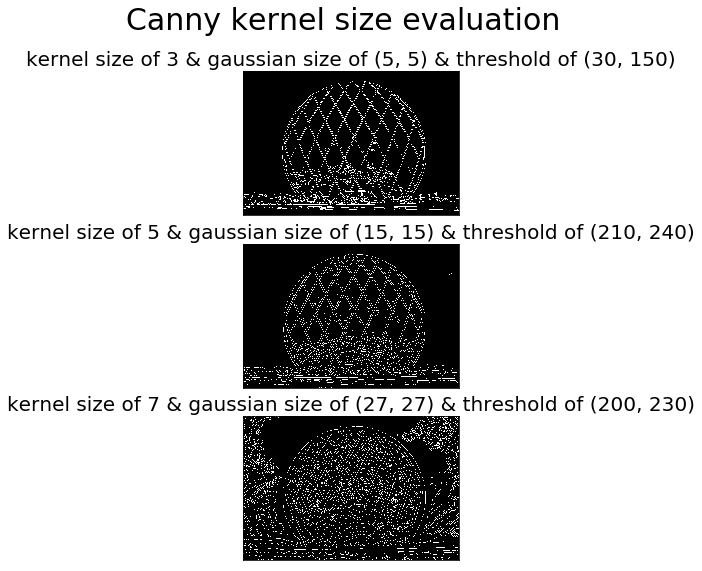

In [409]:
for i in range(len(can_ksizes)):
    plt.subplot(3,1,i+1)
    blurred = cv2.GaussianBlur(img,gauss_size[i],0)
    canny_edges = cv2.Canny(blurred,thresh[i][0],thresh[i][1],apertureSize = can_ksizes[i])
    
    plt.imshow(canny_edges,'gray')
    plt.title('kernel size of {} & gaussian size of {} & threshold of {}'.format(can_ksizes[i],gauss_size[i],thresh[i]),size = 20)
    plt.xticks([])
    plt.yticks([])
plt.suptitle('Canny kernel size evaluation',size=30)
plt.savefig('Canny_ksize_eval.png')
plt.show()